In [180]:
import numpy as np
import requests
import matplotlib.pyplot as plt
from IPython.display import Image
import pandas as pd
import json
from shapely.geometry import Point
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

A dataset containing details about Metro Nashville Police Department reported incidents is available at https://data.nashville.gov/Police/Metro-Nashville-Police-Department-Incidents/2u6v-ujjs. Make use of the API to find all aggravated burglary incidents that were reported during the six month period from January 1, 2021 through June 30, 2021.

In [32]:
endpoint= 'https://data.nashville.gov/resource/2u6v-ujjs.json'

In [33]:
params = {
    'offense_description': 'BURGLARY- AGGRAVATED',
    '$where': 'incident_reported between \'2021-01-01\' AND \'2021-06-30\'',
    '$limit': '5000'
}

In [34]:
response = requests.get(endpoint, 
                        params = params)

In [35]:
response

<Response [200]>

In [36]:
response.json()

[{'primary_key': '20210249540_11',
  'incident_number': '20210249540',
  'report_type': 'D',
  'report_type_description': 'DISPATCHED',
  'incident_status_code': 'O',
  'incident_status_description': 'OPEN',
  'investigation_status': 'Open',
  'incident_occurred': '2021-05-04T23:45:00.000',
  'incident_reported': '2021-05-05T00:45:00.000',
  'incident_location': 'UNIVERSITY CT',
  'latitude': '36.15',
  'longitude': '-86.77',
  'rpa': '8203',
  'zone': '511',
  'location_code': '22',
  'location_description': 'RESIDENCE, HOME',
  'offense_number': '1',
  'offense_nibrs': '220',
  'offense_description': 'BURGLARY- AGGRAVATED',
  'weapon_primary': '09',
  'weapon_description': 'PERSONAL (HANDS)',
  'victim_number': '1',
  'domestic_related': False,
  'victim_type': 'I',
  'victim_description': 'INDIVIDUAL (18 AND OVER)',
  'victim_gender': 'F',
  'victim_race': 'B',
  'victim_ethnicity': 'Non-Hispanic',
  'victim_county_resident': 'RESIDENT',
  'mapped_location': {'type': 'Point', 'coord

In [37]:
### make the response json a dataframe: df = pd.DataFrame.from_dict(data, orient='columns')###
### or if you have nested columns (and I think I do) use df = pd.DataFrame.from_dict(pd.json_normalize(data), orient='columns')###
burglary_df= pd.DataFrame.from_dict(pd.json_normalize( response.json()), orient='columns')

In [47]:
burglary_df.head(1000)

primary_key incident_number report_type report_type_description  \
0    20210249540_11     20210249540           D              DISPATCHED   
1    20210248840_11     20210248840           D              DISPATCHED   
2    20210244919_11     20210244919           D              DISPATCHED   
3    20210244892_13     20210244892           D              DISPATCHED   
4    20210249540_12     20210249540           D              DISPATCHED   
..              ...             ...         ...                     ...   
995  20210200470_11     20210200470           D              DISPATCHED   
996  20210207580_11     20210207580           D              DISPATCHED   
997  20210096134_11     20210096134           D              DISPATCHED   
998  20210119160_11     20210119160           D              DISPATCHED   
999  20210179868_11     20210179868           D              DISPATCHED   

    incident_status_code incident_status_description investigation_status  \
0                      O                        OPEN                 Open   
1                      O                        OPEN                 Open   
2                      O                        OPEN                 Open   
3                      O                        OPEN                 Open   
4                      O                        OPEN                 Open   
..                   ...                         ...                  ...   
995                    O                        OPEN                 Open   
996                    A           CLEARED BY ARREST               Closed   
997                    O                        OPEN                 Open   
998                    O                        OPEN                 Open   
999                    R        REFUSED TO COOPERATE               Closed   

           incident_occurred        incident_reported incident_location  ...  \
0    2021-05-04T23:45:00.000  2021-05-05T00:45:00.000     UNIVERSITY CT  ...   
1    2021-05-04T12:06:00.000  2021-05-04T14:33:00.000      BONNAFAIR DR  ...   
2    2021-05-01T23:00:00.000  2021-05-02T12:40:00.000         8TH AVE S  ...   
3    2021-05-01T21:30:00.000  2021-05-02T11:57:00.000   EAST ARGYLE AVE  ...   
4    2021-05-04T23:45:00.000  2021-05-05T00:45:00.000     UNIVERSITY CT  ...   
..                       ...                      ...               ...  ...   
995  2021-03-09T23:00:00.000  2021-04-09T12:55:00.000          HAYES ST  ...   
996  2021-04-13T05:30:00.000  2021-04-13T12:13:00.000           219 219  ...   
997  2021-02-16T10:30:00.000  2021-02-17T10:19:00.000          CABOT DR  ...   
998  2021-02-01T12:00:00.000  2021-02-28T21:39:00.000           BELL RD  ...   
999  2021-03-30T09:30:00.000  2021-03-30T10:26:00.000         1711 1711  ...   

    domestic_related victim_type        victim_description victim_gender  \
0              False           I  INDIVIDUAL (18 AND OVER)             F   
1              False           I  INDIVIDUAL (18 AND OVER)             F   
2              False           I  INDIVIDUAL (18 AND OVER)             M   
3              False           I  INDIVIDUAL (18 AND OVER)             M   
4              False           I  INDIVIDUAL (18 AND OVER)             M   
..               ...         ...                       ...           ...   
995            False           B                  BUSINESS           NaN   
996            False           I  INDIVIDUAL (18 AND OVER)             M   
997            False           B                  BUSINESS           NaN   
998            False           B                  BUSINESS           NaN   
999             True           I  INDIVIDUAL (18 AND OVER)             F   

    victim_race victim_ethnicity victim_county_resident mapped_location.type  \
0             B     Non-Hispanic               RESIDENT                Point   
1             W     Non-Hispanic               RESIDENT                Point   
2             W     Non-Hispanic           NON RESIDENT             

In [39]:
burglary_df.columns

Index(['primary_key', 'incident_number', 'report_type',
       'report_type_description', 'incident_status_code',
       'incident_status_description', 'investigation_status',
       'incident_occurred', 'incident_reported', 'incident_location',
       'latitude', 'longitude', 'rpa', 'zone', 'location_code',
       'location_description', 'offense_number', 'offense_nibrs',
       'offense_description', 'weapon_primary', 'weapon_description',
       'victim_number', 'domestic_related', 'victim_type',
       'victim_description', 'victim_gender', 'victim_race',
       'victim_ethnicity', 'victim_county_resident', 'mapped_location.type',
       'mapped_location.coordinates', 'zip_code'],
      dtype='object')

In [179]:
### need to get rid of nulls in lat and long###
burglary_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1044 entries, 0 to 1045
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   primary_key                  1044 non-null   object 
 1   incident_number              1044 non-null   object 
 2   report_type                  1044 non-null   object 
 3   report_type_description      1033 non-null   object 
 4   incident_status_code         1044 non-null   object 
 5   incident_status_description  1044 non-null   object 
 6   investigation_status         1044 non-null   object 
 7   incident_occurred            1044 non-null   object 
 8   incident_reported            1044 non-null   object 
 9   incident_location            1042 non-null   object 
 10  latitude                     1044 non-null   float64
 11  longitude                    1044 non-null   float64
 12  rpa                          962 non-null    object 
 13  zone              

In [170]:
### need to get rid of nulls in lat and long###
burglary_df=burglary_df.dropna(subset=['latitude', 'longitude'])

In [171]:
burglary_df.

primary_key incident_number report_type report_type_description  \
0     20210249540_11     20210249540           D              DISPATCHED   
1     20210248840_11     20210248840           D              DISPATCHED   
2     20210244919_11     20210244919           D              DISPATCHED   
3     20210244892_13     20210244892           D              DISPATCHED   
4     20210249540_12     20210249540           D              DISPATCHED   
...              ...             ...         ...                     ...   
1041  20210029313_11     20210029313           D              DISPATCHED   
1042  20210073787_11     20210073787           D              DISPATCHED   
1043  20210127915_11     20210127915           D              DISPATCHED   
1044  20210126551_11     20210126551           O                     NaN   
1045  20210257587_11     20210257587           D              DISPATCHED   

     incident_status_code incident_status_description investigation_status  \
0                       O                        OPEN                 Open   
1                       O                        OPEN                 Open   
2                       O                        OPEN                 Open   
3                       O                        OPEN                 Open   
4                       O                        OPEN                 Open   
...                   ...                         ...                  ...   
1041                    A           CLEARED BY ARREST               Closed   
1042                    A           CLEARED BY ARREST               Closed   
1043                    A           CLEARED BY ARREST               Closed   
1044                    O                        OPEN                 Open   
1045                    O                        OPEN                 Open   

            incident_occurred        incident_reported incident_location  ...  \
0     2021-05-04T23:45:00.000  2021-05-05T00:45:00.000     UNIVERSITY CT  ...   
1     2021-05-04T12:06:00.000  2021-05-04T14:33:00.000      BONNAFAIR DR  ...   
2     2021-05-01T23:00:00.000  2021-05-02T12:40:00.000         8TH AVE S  ...   
3     2021-05-01T21:30:00.000  2021-05-02T11:57:00.000   EAST ARGYLE AVE  ...   
4     2021-05-04T23:45:00.000  2021-05-05T00:45:00.000     UNIVERSITY CT  ...   
...                       ...                      ...               ...  ...   
1041  2021-01-15T21:50:00.000  2021-01-16T02:36:00.000           804 804  ...   
1042  2021-02-06T12:00:00.000  2021-02-06T18:19:00.000             33 33  ...   
1043  2021-03-03T15:30:00.000  2021-03-05T13:33:00.000           804 804  ...   
1044  2021-02-23T10:30:00.000  2021-03-03T23:12:00.000  NOLENSVILLE PIKE  ...   
1045  2021-05-07T16:30:00.000  2021-05-09T00:17:00.000           KATE ST  ...   

     domestic_related victim_type        victim_description victim_gender  \
0               False           I  INDIVIDUAL (18 AND OVER)             F   
1               False           I  INDIVIDUAL (18 AND OVER)             F   
2               False           I  INDIVIDUAL (18 AND OVER)             M   
3               False           I  INDIVIDUAL (18 AND OVER)             M   
4               False           I  INDIVIDUAL (18 AND OVER)             M   
...               ...         ...                       ...           ...   
1041            False           I  INDIVIDUAL (18 AND OVER)             F   
1042             True           I  INDIVIDUAL (18 AND OVER)             F   
1043            False           I  INDIVIDUAL (18 AND OVER)             M   
1044            False           B                  BUSINESS           NaN   
1045            False           I  INDIVIDUAL (18 AND OVER)             M   

     victim_race victim_ethnicity victim_county_resident mapped_location.type  \
0              B     Non-Hispanic               RESIDENT                Point   
1              W     Non-Hispanic               RESIDENT                Point   
2              W  

In [200]:
burglary_df['zone']

0       511
1       525
2       815
3       NaN
4       511
       ... 
1041    327
1042    511
1043    631
1044    827
1045    715
Name: zone, Length: 1044, dtype: object

In [173]:
type(tn_tract)

geopandas.geodataframe.GeoDataFrame

In [174]:
type(burglary_df)

pandas.core.frame.DataFrame

In [177]:
###need to combine burglary_df and tn_tracts
### to do that need both to be geopandas and burglary_df isn't
### it does have lat and long, but they are objects, so I need them to be floats
###try: weather["Temp"] = weather.Temp.astype(float)
### should probably try to do this as a loop so I'm not running same code for lat and long, may come back to do that
burglary_df['latitude']= burglary_df.latitude.astype(float)
burglary_df['longitude']= burglary_df.longitude.astype(float)

In [182]:
### First create a geometry column that is a Point datatype
burglary_df['geometry'] = burglary_df.apply(lambda x: Point((x.longitude, 
                                                         x.latitude)), 
                                        axis=1)

In [183]:
burglary_df['geometry']

0                    POINT (-86.77 36.15)
1                     POINT (-86.63 36.2)
2                    POINT (-86.78 36.14)
3                    POINT (-86.78 36.14)
4                    POINT (-86.77 36.15)
                      ...                
1041    POINT (-86.64700000000001 36.052)
1042               POINT (-86.765 36.152)
1043               POINT (-86.807 36.204)
1044                 POINT (-86.72 36.05)
1045     POINT (-86.70999999999999 36.27)
Name: geometry, Length: 1044, dtype: object

In [186]:
burglary_df_geo = gpd.GeoDataFrame(burglary_df, 
                           crs = tn_tract.crs, 
                           geometry = burglary_df['geometry'])

In [188]:
type(burglary_df_geo)

geopandas.geodataframe.GeoDataFrame

In [192]:
burglary_df_geo.head()

primary_key incident_number report_type report_type_description  \
0  20210249540_11     20210249540           D              DISPATCHED   
1  20210248840_11     20210248840           D              DISPATCHED   
2  20210244919_11     20210244919           D              DISPATCHED   
3  20210244892_13     20210244892           D              DISPATCHED   
4  20210249540_12     20210249540           D              DISPATCHED   

  incident_status_code incident_status_description investigation_status  \
0                    O                        OPEN                 Open   
1                    O                        OPEN                 Open   
2                    O                        OPEN                 Open   
3                    O                        OPEN                 Open   
4                    O                        OPEN                 Open   

         incident_occurred        incident_reported incident_location  ...  \
0  2021-05-04T23:45:00.000  2021-05-05T00:45:00.000     UNIVERSITY CT  ...   
1  2021-05-04T12:06:00.000  2021-05-04T14:33:00.000      BONNAFAIR DR  ...   
2  2021-05-01T23:00:00.000  2021-05-02T12:40:00.000         8TH AVE S  ...   
3  2021-05-01T21:30:00.000  2021-05-02T11:57:00.000   EAST ARGYLE AVE  ...   
4  2021-05-04T23:45:00.000  2021-05-05T00:45:00.000     UNIVERSITY CT  ...   

   victim_type        victim_description victim_gender victim_race  \
0            I  INDIVIDUAL (18 AND OVER)             F           B   
1            I  INDIVIDUAL (18 AND OVER)             F           W   
2            I  INDIVIDUAL (18 AND OVER)             M           W   
3            I  INDIVIDUAL (18 AND OVER)             M           W   
4            I  INDIVIDUAL (18 AND OVER)             M           B   

  victim_ethnicity victim_county_resident mapped_location.type  \
0     Non-Hispanic               RESIDENT                Point   
1     Non-Hispanic               RESIDENT                Point   
2     Non-Hispanic           NON RESIDENT                Point   
3     Non-Hispanic           NON RESIDENT                Point   
4     Non-Hispanic               RESIDENT                Point   

  mapped_location.coordinates zip_code                    geometry  
0             [-86.77, 36.15]      NaN  POINT (-86.77000 36.15000)  
1              [-86.63, 36.2]      NaN  POINT (-86.63000 36.20000)  
2             [-86.78, 36.14]      NaN  POINT (-86.78000 36.14000)  
3             [-86.78, 36.14]      NaN  POINT (-86.78000 36.14000)  
4             [-86.77, 36.15]      NaN  POINT (-86.77000 36.15000)  

[5 rows x 33 columns]

In [193]:
### now combine them with a format like: stops_by_zip = gpd.sjoin(bus_geo, zipcodes, op = 'within')
burglary_by_zip = gpd.sjoin(burglary_df_geo, tn_tract, op = 'within')

In [194]:
burglary_by_zip.head()

primary_key incident_number report_type report_type_description  \
0    20210249540_11     20210249540           D              DISPATCHED   
4    20210249540_12     20210249540           D              DISPATCHED   
63   20210187070_11     20210187070           D              DISPATCHED   
129  20210006869_11     20210006869           D              DISPATCHED   
158  20210223220_11     20210223220           D              DISPATCHED   

    incident_status_code incident_status_description investigation_status  \
0                      O                        OPEN                 Open   
4                      O                        OPEN                 Open   
63                     O                        OPEN                 Open   
129                    O                        OPEN                 Open   
158                    O                        OPEN                 Open   

           incident_occurred        incident_reported    incident_location  \
0    2021-05-04T23:45:00.000  2021-05-05T00:45:00.000        UNIVERSITY CT   
4    2021-05-04T23:45:00.000  2021-05-05T00:45:00.000        UNIVERSITY CT   
63   2021-04-02T09:30:00.000  2021-04-02T20:04:00.000  LITTLE HAMILTON AVE   
129  2021-01-04T10:45:00.000  2021-01-05T03:11:00.000            RAINS AVE   
158  2021-04-20T20:00:00.000  2021-04-21T10:00:00.000            2ND AVE S   

     ...  TRACTCE        GEOID NAME          NAMELSAD  MTFCC FUNCSTAT  \
0    ...   016000  47037016000  160  Census Tract 160  G5020        S   
4    ...   016000  47037016000  160  Census Tract 160  G5020        S   
63   ...   016000  47037016000  160  Census Tract 160  G5020        S   
129  ...   016000  47037016000  160  Census Tract 160  G5020        S   
158  ...   016000  47037016000  160  Census Tract 160  G5020        S   

       ALAND AWATER     INTPTLAT      INTPTLON  
0    1158914      0  +36.1454955  -086.7638143  
4    1158914      0  +36.1454955  -086.7638143  
63   1158914      0  +36.1454955  -086.7638143  
129  1158914      0  +36.1454955  -086.7638143  
158  1158914      0  +36.1454955  -086.7638143  

[5 rows x 46 columns]

In [196]:
### number of burglaries reported, I think...
burglary_by_zip['incident_reported'].value_counts('geometry')

2021-06-13T02:18:00.000    0.008621
2021-06-05T03:49:00.000    0.007663
2021-03-06T01:46:00.000    0.006705
2021-04-30T00:32:00.000    0.006705
2021-06-05T03:30:00.000    0.005747
                             ...   
2021-02-27T17:54:00.000    0.000958
2021-04-20T21:32:00.000    0.000958
2021-04-21T16:43:00.000    0.000958
2021-02-01T20:43:00.000    0.000958
2021-03-07T09:48:00.000    0.000958
Name: incident_reported, Length: 819, dtype: float64

Download the 2019 census tract shapefiles for Tennessee from https://www.census.gov/geographies/mapping-files/time-series/geo/tiger-line-file.2019.html. (The FIPS code for Tennessee is 47). Perform a spatial join to determine the census tract in which each burglary incident occurred. Which census tract had the highest number of burglaries? Warning - each incident can appear multiple times if there are multiple victims, so be sure that you aren't double-counting any incidents.

In [84]:
tn_tract = gpd.read_file('../geospatial_api-orange-oscelots/tn.track/tl_2019_47_tract.shp')
print(tn_tract.crs)
tn_tract.head( )

epsg:4269


STATEFP COUNTYFP TRACTCE        GEOID    NAME             NAMELSAD  MTFCC  \
0      47      165  021002  47165021002  210.02  Census Tract 210.02  G5020   
1      47      165  020901  47165020901  209.01  Census Tract 209.01  G5020   
2      47      165  020300  47165020300     203     Census Tract 203  G5020   
3      47      165  020902  47165020902  209.02  Census Tract 209.02  G5020   
4      47      165  020800  47165020800     208     Census Tract 208  G5020   

  FUNCSTAT     ALAND   AWATER     INTPTLAT      INTPTLON  \
0        S  30654374   207994  +36.3521602  -086.6464309   
1        S  23811766  3412697  +36.3483143  -086.4070907   
2        S  14629292        0  +36.5796910  -086.5114955   
3        S   9756715        0  +36.3724350  -086.4411274   
4        S  10235406    37743  +36.4005117  -086.4528100   

                                            geometry  
0  POLYGON ((-86.69927 36.32775, -86.69923 36.327...  
1  POLYGON ((-86.43949 36.35962, -86.43915 36.359...  
2  POLYGON ((-86.53716 36.56852, -86.53713 36.568...  
3  POLYGON ((-86.47106 36.38238, -86.47081 36.382...  
4  POLYGON ((-86.48786 36.37320, -86.48783 36.373...

For this part, you'll need to request a census API key. Using the 2019 American Community Survey API, obtain, for each census tract, the population (B01001_001E in the detailed tables) and the median income (S1901_C01_012E in the subject tables). Hint: Tennessee's FIPS code is 47 and Davidson County's FIPS code is 37. Merge this new data with the burglaries data above.

In [126]:
with open ('../geospatial_api-orange-oscelots/cenus.json') as fi:
    credentials= json.load(fi)

api_key= credentials['api_key']

In [127]:
endpoint= 'https://api.census.gov/data/2019/acs/acs5'

In [129]:
params ={
    'get': 'B01001_001E',
    'for': 'tract:*',
    'in': 'state:47%20county:037',
    'key':api_key
}

In [130]:
response = requests.get(endpoint, params = params)

In [131]:
response

<Response [200]>

In [133]:
response.json()

[['B01001_001E', 'state', 'county', 'tract'],
 ['12176', '47', '037', '015631'],
 ['4098', '47', '037', '015804'],
 ['2466', '47', '037', '017701'],
 ['5210', '47', '037', '017702'],
 ['8254', '47', '037', '018301'],
 ['2774', '47', '037', '018302'],
 ['4205', '47', '037', '018409'],
 ['3467', '47', '037', '018410'],
 ['2553', '47', '037', '011002'],
 ['1860', '47', '037', '014300'],
 ['4717', '47', '037', '015402'],
 ['4882', '47', '037', '015405'],
 ['3820', '47', '037', '015502'],
 ['5553', '47', '037', '015615'],
 ['6507', '47', '037', '015618'],
 ['4841', '47', '037', '016500'],
 ['4849', '47', '037', '016800'],
 ['5386', '47', '037', '017402'],
 ['2967', '47', '037', '017500'],
 ['3619', '47', '037', '018102'],
 ['7432', '47', '037', '018401'],
 ['4187', '47', '037', '018602'],
 ['4519', '47', '037', '019003'],
 ['2205', '47', '037', '012600'],
 ['5240', '47', '037', '010501'],
 ['3397', '47', '037', '010106'],
 ['2533', '47', '037', '010103'],
 ['2955', '47', '037', '010104'],
 

In [137]:
res= response.json()

In [145]:
Population_data= pd.DataFrame(res, columns= ['Population', 'State', 'County', 'Tract'])

In [146]:
Population_data

Population  State  County   Tract
0    B01001_001E  state  county   tract
1          12176     47     037  015631
2           4098     47     037  015804
3           2466     47     037  017701
4           5210     47     037  017702
..           ...    ...     ...     ...
157         5252     47     037  015613
158         7262     47     037  015620
159         2345     47     037  016100
160         4617     47     037  011400
161         2099     47     037  013800

[162 rows x 4 columns]

In [148]:
Population_data=Population_data.drop(index= [0])

In [150]:
endpoint_2= 'https://api.census.gov/data/2019/acs/acs5/subject'

In [155]:
params ={
    'get': 'S0101_C01_001E',
    'for': 'tract:*',
    'in': 'state:47%20county:037',
    'key':api_key
}

In [156]:
response_2 = requests.get(endpoint_2, params = params)

In [157]:
response_2

<Response [200]>

In [158]:
response_2.json()

[['S0101_C01_001E', 'state', 'county', 'tract'],
 ['12176', '47', '037', '015631'],
 ['4098', '47', '037', '015804'],
 ['2466', '47', '037', '017701'],
 ['5210', '47', '037', '017702'],
 ['8254', '47', '037', '018301'],
 ['2774', '47', '037', '018302'],
 ['4205', '47', '037', '018409'],
 ['3467', '47', '037', '018410'],
 ['2553', '47', '037', '011002'],
 ['1860', '47', '037', '014300'],
 ['4717', '47', '037', '015402'],
 ['4882', '47', '037', '015405'],
 ['3820', '47', '037', '015502'],
 ['5553', '47', '037', '015615'],
 ['6507', '47', '037', '015618'],
 ['4841', '47', '037', '016500'],
 ['4849', '47', '037', '016800'],
 ['5386', '47', '037', '017402'],
 ['2967', '47', '037', '017500'],
 ['3619', '47', '037', '018102'],
 ['7432', '47', '037', '018401'],
 ['4187', '47', '037', '018602'],
 ['4519', '47', '037', '019003'],
 ['2205', '47', '037', '012600'],
 ['5240', '47', '037', '010501'],
 ['3397', '47', '037', '010106'],
 ['2533', '47', '037', '010103'],
 ['2955', '47', '037', '010104']

In [159]:
res2=response_2.json()

In [160]:
median_data=pd.DataFrame(res2, columns= ['Median_Household_Income', 'State', 'County', 'Tract'])

In [163]:
median_data=median_data.drop(index=[0])

In [164]:
median_data

Median_Household_Income State County   Tract
1                     12176    47    037  015631
2                      4098    47    037  015804
3                      2466    47    037  017701
4                      5210    47    037  017702
5                      8254    47    037  018301
..                      ...   ...    ...     ...
157                    5252    47    037  015613
158                    7262    47    037  015620
159                    2345    47    037  016100
160                    4617    47    037  011400
161                    2099    47    037  013800

[161 rows x 4 columns]

In [166]:
median_income_and_pop= pd.merge(median_data, Population_data, on= ['State', 'County','Tract'])

In [197]:
median_income_and_pop

Median_Household_Income State County   Tract Population
0                     12176    47    037  015631      12176
1                      4098    47    037  015804       4098
2                      2466    47    037  017701       2466
3                      5210    47    037  017702       5210
4                      8254    47    037  018301       8254
..                      ...   ...    ...     ...        ...
156                    5252    47    037  015613       5252
157                    7262    47    037  015620       7262
158                    2345    47    037  016100       2345
159                    4617    47    037  011400       4617
160                    2099    47    037  013800       2099

[161 rows x 5 columns]

In [202]:
burglary_by_zip['Tract']= burglary_by_zip['TRACTCE']

In [204]:
pd.merge(burglary_by_zip, median_income_and_pop, on='Tract')

primary_key incident_number report_type report_type_description  \
0     20210249540_11     20210249540           D              DISPATCHED   
1     20210249540_12     20210249540           D              DISPATCHED   
2     20210187070_11     20210187070           D              DISPATCHED   
3     20210006869_11     20210006869           D              DISPATCHED   
4     20210223220_11     20210223220           D              DISPATCHED   
...              ...             ...         ...                     ...   
1039  20210344666_11     20210344666           D              DISPATCHED   
1040  20210083306_12     20210083306           S                 SUSPECT   
1041  20210083306_11     20210083306           S                 SUSPECT   
1042  20210225465_12     20210225465           D              DISPATCHED   
1043  20210133932_12     20210133932           D              DISPATCHED   

     incident_status_code incident_status_description investigation_status  \
0                       O                        OPEN                 Open   
1                       O                        OPEN                 Open   
2                       O                        OPEN                 Open   
3                       O                        OPEN                 Open   
4                       O                        OPEN                 Open   
...                   ...                         ...                  ...   
1039                    R        REFUSED TO COOPERATE               Closed   
1040                    A           CLEARED BY ARREST               Closed   
1041                    A           CLEARED BY ARREST               Closed   
1042                    A           CLEARED BY ARREST               Closed   
1043                    A           CLEARED BY ARREST               Closed   

            incident_occurred        incident_reported    incident_location  \
0     2021-05-04T23:45:00.000  2021-05-05T00:45:00.000        UNIVERSITY CT   
1     2021-05-04T23:45:00.000  2021-05-05T00:45:00.000        UNIVERSITY CT   
2     2021-04-02T09:30:00.000  2021-04-02T20:04:00.000  LITTLE HAMILTON AVE   
3     2021-01-04T10:45:00.000  2021-01-05T03:11:00.000            RAINS AVE   
4     2021-04-20T20:00:00.000  2021-04-21T10:00:00.000            2ND AVE S   
...                       ...                      ...                  ...   
1039  2021-06-24T14:00:00.000  2021-06-24T14:31:00.000              832 832   
1040  2021-02-10T00:01:00.000  2021-02-11T00:20:00.000              497 497   
1041  2021-02-10T00:01:00.000  2021-02-11T00:20:00.000              497 497   
1042  2021-04-22T09:45:00.000  2021-04-22T10:40:00.000            2901 2901   
1043  2021-03-07T08:35:00.000  2021-03-07T09:48:00.000              488 488   

      ...  FUNCSTAT    ALAND  AWATER     INTPTLAT      INTPTLON   Tract  \
0     ...         S  1158914       0  +36.1454955  -086.7638143  016000   
1     ...         S  1158914       0  +36.1454955  -086.7638143  016000   
2     ...         S  1158914       0  +36.1454955  -086.7638143  016000   
3     ...         S  1158914       0  +36.1454955  -086.7638143  016000   
4     ...         S  1158914       0  +36.1454955  -086.7638143  016000   
...   ...       ...      ...     ...          ...           ...     ...   
1039  ...         S  3414228       0  +36.2059302  -086.5922143  015405   
1040  ...         S  8463276       0  +36.0609910  -086.7571310  018801   
1041  ...         S  8463276       0  +36.0609910  -086.7571310  018801   
1042  ...         S  2108549  143854  +36.1685854  -086.8283325  013602   
1043  ...         S  3613159       0  +36.2250503  -086.7398861  011002   

     Median_Household_Income State County Population  
0                        945    47    037        945  
1                        945    47    037        945  
2                        945    47    037        945  
3                        945    47    037        945  
4                        945    47

In [205]:
median_income_pop_burg= pd.merge(burglary_by_zip, median_income_and_pop, on='Tract')

In [216]:
median_income_pop_burg.head()

primary_key incident_number report_type report_type_description  \
0  20210249540_11     20210249540           D              DISPATCHED   
1  20210249540_12     20210249540           D              DISPATCHED   
2  20210187070_11     20210187070           D              DISPATCHED   
3  20210006869_11     20210006869           D              DISPATCHED   
4  20210223220_11     20210223220           D              DISPATCHED   

  incident_status_code incident_status_description investigation_status  \
0                    O                        OPEN                 Open   
1                    O                        OPEN                 Open   
2                    O                        OPEN                 Open   
3                    O                        OPEN                 Open   
4                    O                        OPEN                 Open   

         incident_occurred        incident_reported    incident_location  ...  \
0  2021-05-04T23:45:00.000  2021-05-05T00:45:00.000        UNIVERSITY CT  ...   
1  2021-05-04T23:45:00.000  2021-05-05T00:45:00.000        UNIVERSITY CT  ...   
2  2021-04-02T09:30:00.000  2021-04-02T20:04:00.000  LITTLE HAMILTON AVE  ...   
3  2021-01-04T10:45:00.000  2021-01-05T03:11:00.000            RAINS AVE  ...   
4  2021-04-20T20:00:00.000  2021-04-21T10:00:00.000            2ND AVE S  ...   

   FUNCSTAT    ALAND AWATER     INTPTLAT      INTPTLON   Tract  \
0         S  1158914      0  +36.1454955  -086.7638143  016000   
1         S  1158914      0  +36.1454955  -086.7638143  016000   
2         S  1158914      0  +36.1454955  -086.7638143  016000   
3         S  1158914      0  +36.1454955  -086.7638143  016000   
4         S  1158914      0  +36.1454955  -086.7638143  016000   

  Median_Household_Income State County Population  
0                     945    47    037        945  
1                     945    47    037        945  
2                     945    47    037        945  
3                     945    47    037        945  
4                     945    47    037        945  

[5 rows x 51 columns]

In [208]:
median_income_pop_burg.columns

Index(['primary_key', 'incident_number', 'report_type',
       'report_type_description', 'incident_status_code',
       'incident_status_description', 'investigation_status',
       'incident_occurred', 'incident_reported', 'incident_location',
       'latitude', 'longitude', 'rpa', 'zone', 'location_code',
       'location_description', 'offense_number', 'offense_nibrs',
       'offense_description', 'weapon_primary', 'weapon_description',
       'victim_number', 'domestic_related', 'victim_type',
       'victim_description', 'victim_gender', 'victim_race',
       'victim_ethnicity', 'victim_county_resident', 'mapped_location.type',
       'mapped_location.coordinates', 'zip_code', 'geometry', 'index_right',
       'STATEFP', 'COUNTYFP', 'TRACTCE', 'GEOID', 'NAME', 'NAMELSAD', 'MTFCC',
       'FUNCSTAT', 'ALAND', 'AWATER', 'INTPTLAT', 'INTPTLON', 'Tract',
       'Median_Household_Income', 'State', 'County', 'Population'],
      dtype='object')

In [212]:
median_income_pop_burg(['incident_number','incident_reported','incident_location','zip_code', 'geometry', 'GEOID', 'NAME', 'NAMELSAD', 'MTFCC',
       'FUNCSTAT', 'ALAND', 'AWATER', 'INTPTLAT', 'INTPTLON', 'Tract',
       'Median_Household_Income', 'State', 'County', 'Population'])

TypeError: 'GeoDataFrame' object is not callable

Create a choropleth showing the number of burglaries per 1000 residents for each census tract.

Finally, we'll build some statistical models to see how well we can explain the number of aggravated burglaries using the median income of each census tract. For this, we'll be using the Generalized Linear Models module of the statsmodels library.

a. Build a "base model" - a Poisson regression model with just an intercept term with target variable the rate of burglaries per census tract. (Offset using the [log of the] population so that we are looking at the rate of burglaries per population instead of the number of burglaries.)

b. Now, build a Poisson regression model with target variable the rate of burglaries and predictor variable the median income. (Don't forget to offset by the population).

c. Finally, try out a negative binomial model. To get started with a negative binomial model, you can check out this tutorial.

d. How do your models compare? Hint: the fit models have an AIC attribute

In [223]:
median_income_pop_burg['Median_Household_Income']=median_income_pop_burg['Median_Household_Income'].astype(int)

In [232]:
median_income_pop_burg.columns

Index(['primary_key', 'incident_number', 'report_type',
       'report_type_description', 'incident_status_code',
       'incident_status_description', 'investigation_status',
       'incident_occurred', 'incident_reported', 'incident_location',
       'latitude', 'longitude', 'rpa', 'zone', 'location_code',
       'location_description', 'offense_number', 'offense_nibrs',
       'offense_description', 'weapon_primary', 'weapon_description',
       'victim_number', 'domestic_related', 'victim_type',
       'victim_description', 'victim_gender', 'victim_race',
       'victim_ethnicity', 'victim_county_resident', 'mapped_location.type',
       'mapped_location.coordinates', 'zip_code', 'geometry', 'index_right',
       'STATEFP', 'COUNTYFP', 'TRACTCE', 'GEOID', 'NAME', 'NAMELSAD', 'MTFCC',
       'FUNCSTAT', 'ALAND', 'AWATER', 'INTPTLAT', 'INTPTLON', 'Tract',
       'Median_Household_Income', 'State', 'County', 'Population'],
      dtype='object')

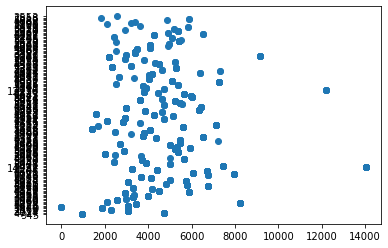

In [235]:
plt.scatter(median_income_pop_burg['Median_Household_Income'],median_income_pop_burg['Population'])

Prepare a short presentation (<10 minutes) of your findings.